# Bayesian Inference with PyFlux.

I recommend using venv to set up virtual environments. These are isolated Python installations and then you won't run into conflicts there.

To setup, type "python3 -m venv <envname>". To activate type ". <envname>/bin/activate" (the "." reads the contents into the shell which sets up the proper environment variables.) If you want to leave type "deactivate".

In this notebook we will explore the PyFlux library for Bayesian inference for time series.

Prior to running this, install pyflux, seaborn, numpy, and matplotlib. To see this notebook, install jupyter. Then, go to this directory and type "jupyter notebook" and you can open the notebook.

Execute lines by shift+Return.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyflux as pf

## Some toy data

Again, we use toy data generate from an ARMA process. Feel free to use more interesting data sources.

I always like to start with data that is generated in a way that I know what the outcome should be. One can then gradually add noise and structure and move out of the "comfort zone" of a method and see if it still performs well or not.

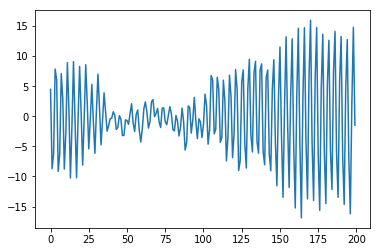

In [2]:
from statsmodels.tsa.arima_process import arma_generate_sample
xs = arma_generate_sample([1.0, -0.6, 1.0, -0.6], [1.0, 0.5], 200, 1.0, burnin=100)
plt.plot(xs)

## Fitting models with PyFlux

The PyFlux interface is again similar to that of statsmodels, where the steps are
  1. construct a model, passing in data and parameters.
  2. call fit to fit the model to the data, returning a result object.
  3. interact with the result object to predict, etc.
  
We are using an ARIMA model, but set the differencing to zero to get essentially an ARMA model.

In [3]:
model = pf.ARIMA(data=xs, ar=3, ma=2)

In [4]:
result = model.fit()

In [5]:
result.summary()

Normal ARIMA(3,0,2)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 3                                           Log Likelihood: -290.3055                         
End Date: 199                                           AIC: 594.611                                      
Number of observations: 197                             BIC: 617.5934                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.2319    0.1725     -1.3446  0.1787   (-0.57 | 0.1061)         
AR(1)                                

The result summary contains the estimates of the parameters. We can see that the AR parameters are pretty close to what we have specified in the model above. MA parameters not so much.

Now an interesting feature of Bayesian inference is that we can take a look a the distribution of the parameters after inference. This takes the traces from the MCMC computation and plots histograms for the parameters.

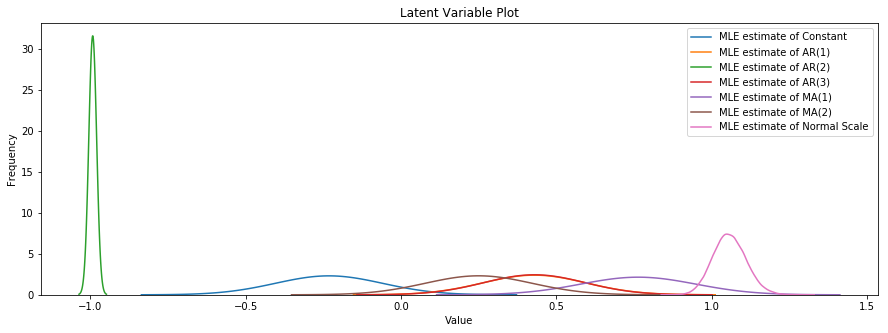

In [6]:
model.plot_z()

Note that the AR(2) seems to be much more certain than the other parameters.

Again, plot_fit() shows the fit.

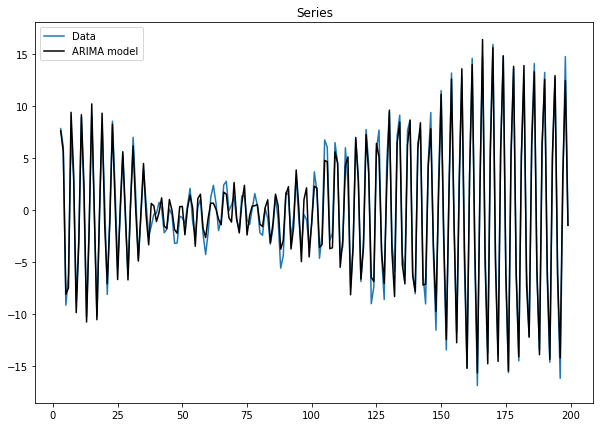

In [7]:
model.plot_fit()

plot_predict(), which takes an h parameter specifying how far to predict ahead, does a forecast, but also includes error bars from the MCMC sampling into the prediction. These look similar to what we got from pyflux, but they actually come from the Bayesian inference.

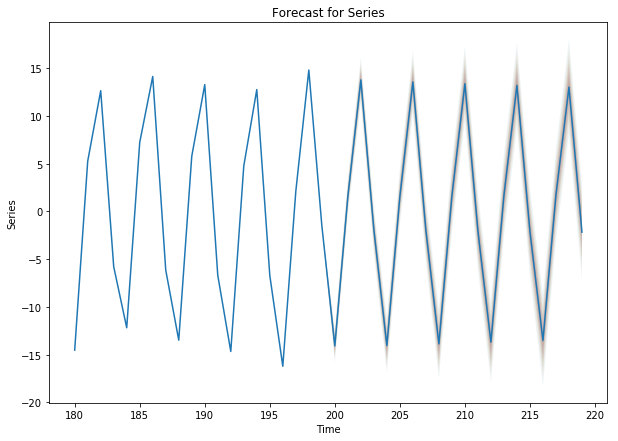

In [8]:
model.plot_predict(h=20)

We have only scratched the surface here. PyFlux has many other models, including many which don't have normal Distributions, but for example Poisson distributions and are therefore more useful for certain settings. Also try out other data sources!